# PROJECT : CEMENT STRENGTH  PREDICTION
A COMPANY (CEMENT PRODUCING) INTENDS TO WORK ON BETTER AND HIGH QUALITY CEMENT BASED OFF PREVIOUS PRODUCTION. THEY HAVE APPROACHED US
WITH THE MAIN AIM OF KNOWING WHAT MATERIAL OR MATERIALS THAT THEY NEED  TO INCERASE OR DECREASE TO FACILITATE THIS GOAL .
THE MAIN METHODOLOGY FOR THIS PROJECT WILL BE THAT OF MULTIPLE LINEAR REGRESSION.

In [1]:
# Importing the necessary libraries or dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [2]:
# Reading in the data 
df = pd.read_csv("C:\\Datasets\\Cement_Production\\Concrete Compressive Strength.csv")

In [3]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
df.shape

(1030, 9)

In [5]:
df.isnull().sum()

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age (day)                        0
Concrete compressive strength    0
dtype: int64

In [6]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [7]:
df.tail(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.401235


# EXPLORATORY DATA ANALYSIS

In [8]:
# Drawing a Histogram Plot for all the variables to know the frequency of all our variables
def show_histogram(column,df=df):
    """This function takes in a column and returns a plotted histogram,
    The fig is first instantiated with dimensions of (20,8). What follows comes form the intution or 
    design of the seaborn histogram function .
    
    For more on this : 
    try :
     import seaborn as sns
     help(sns.histplot)
    except :
        ValueError : 
    """
    fig =plt.figure(figsize=(20,8))
    sns.histplot(x=column,data=df)
    plt.xlabel(column)
    plt.title(f"The distribution of {column}")
    

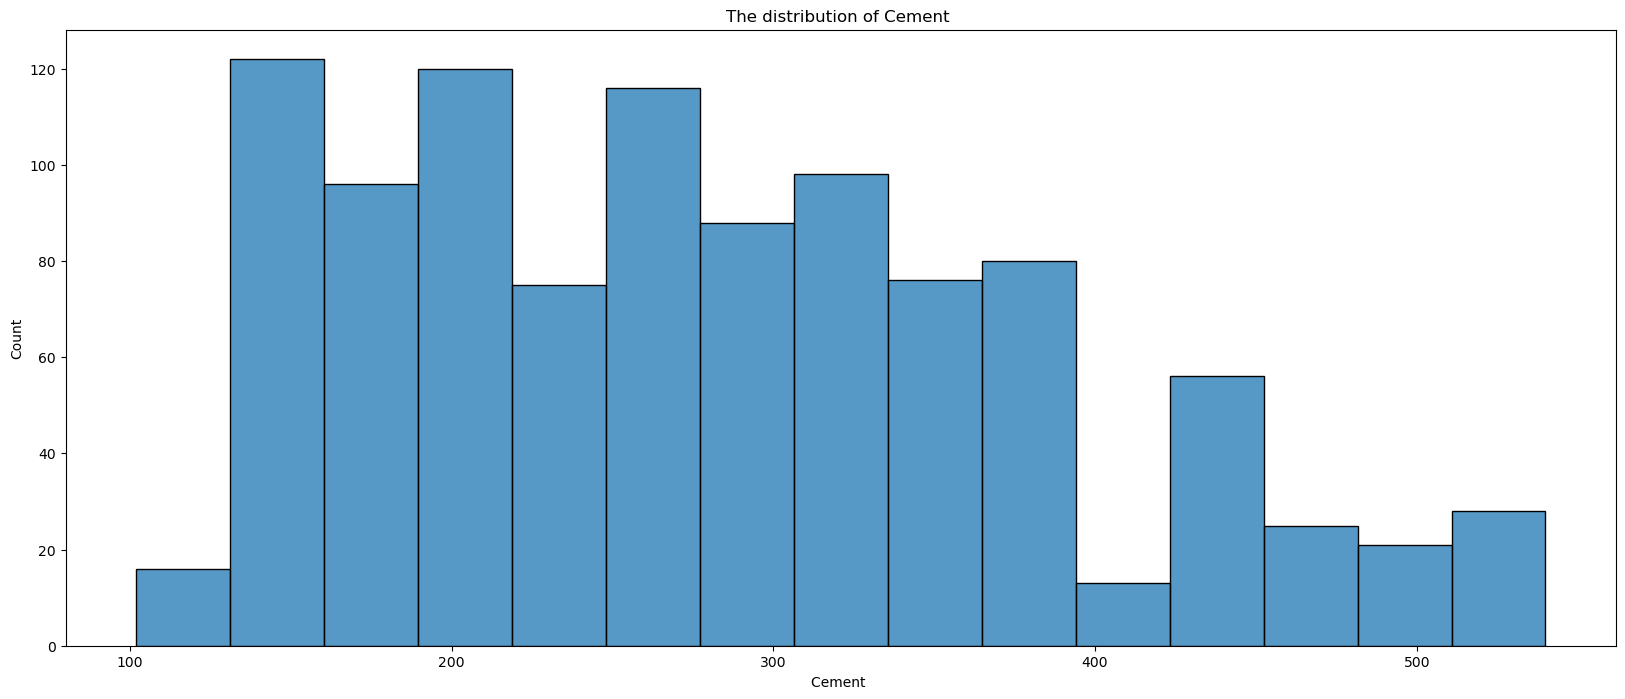

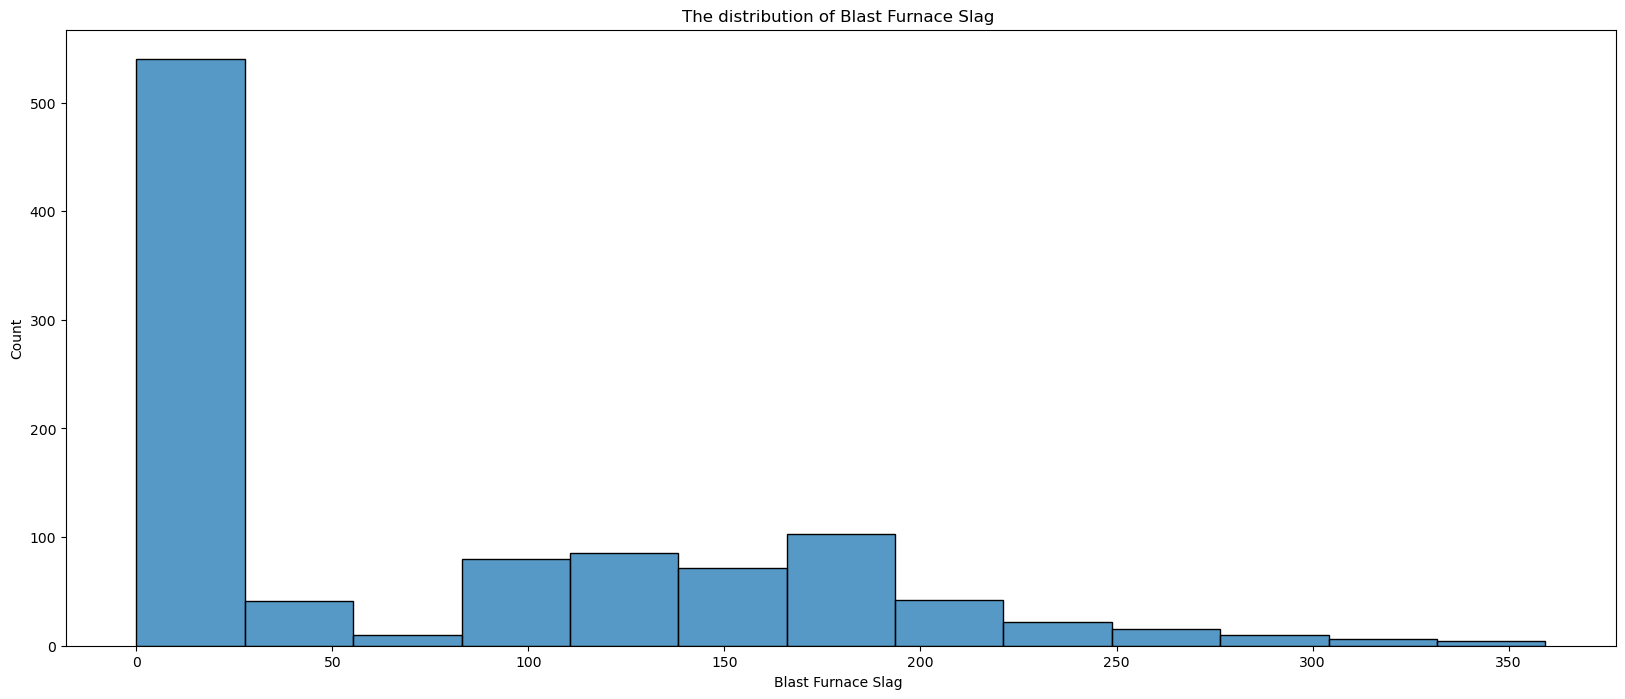

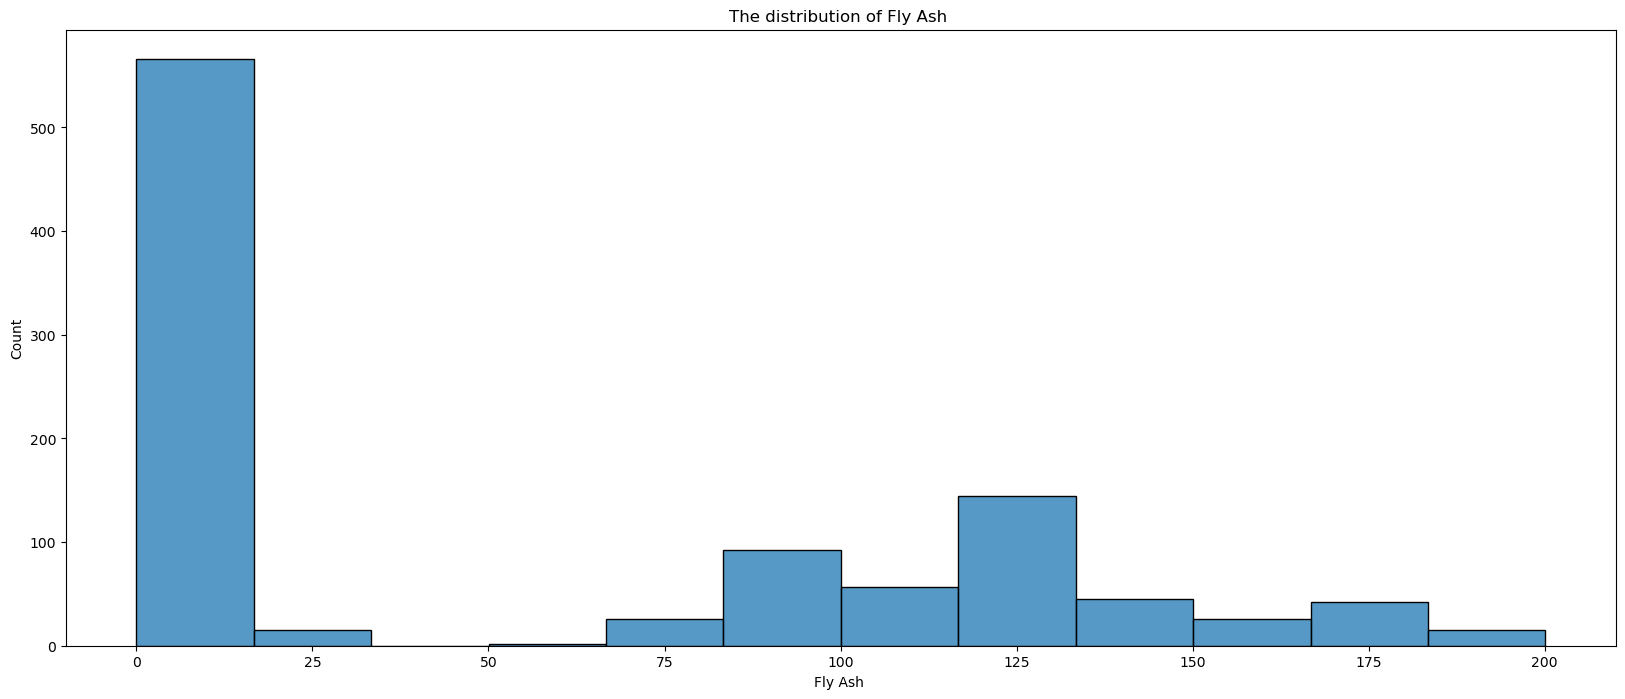

In [9]:
# Now for all the columns, for better presentation I will plot 3 at a time
for column in df.columns[:3]:
    show_histogram(column)

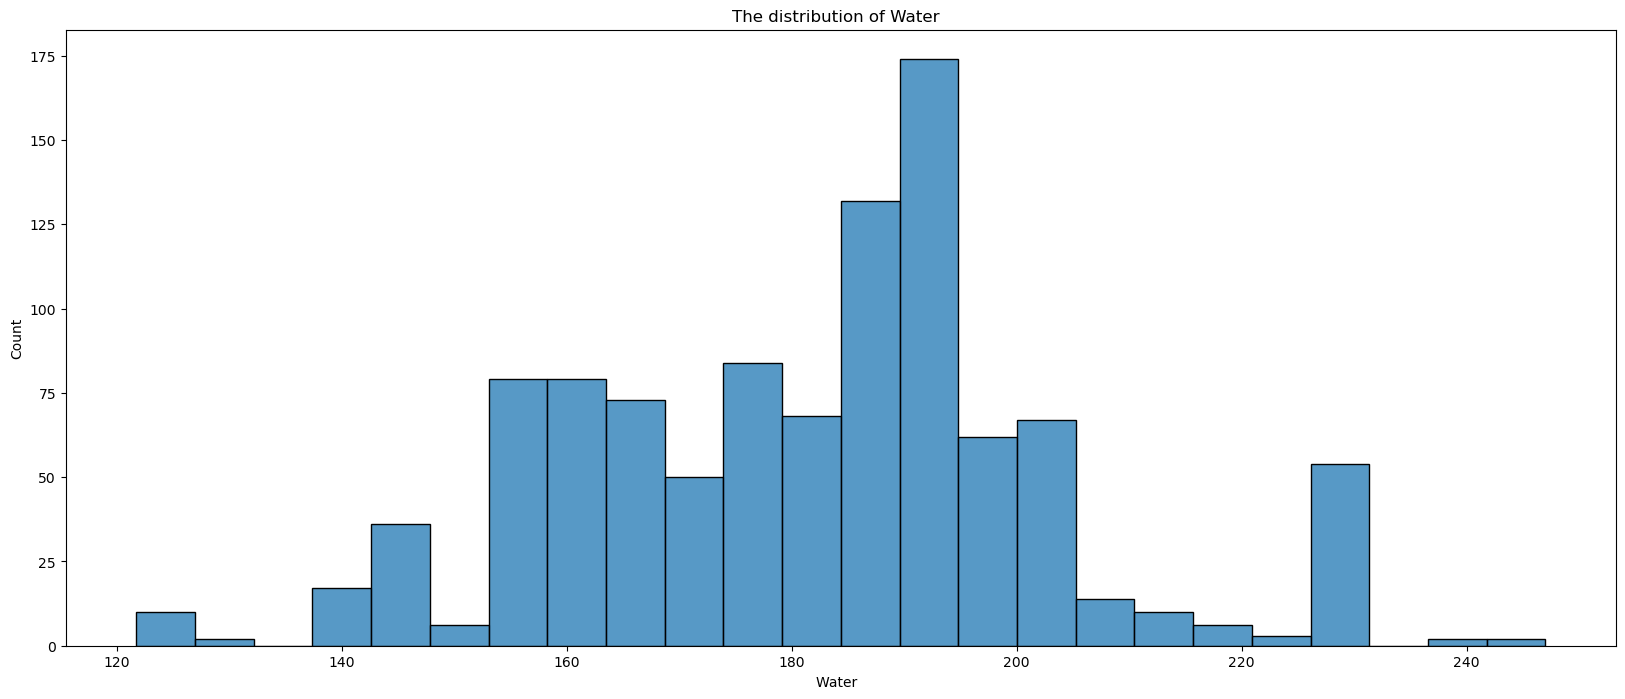

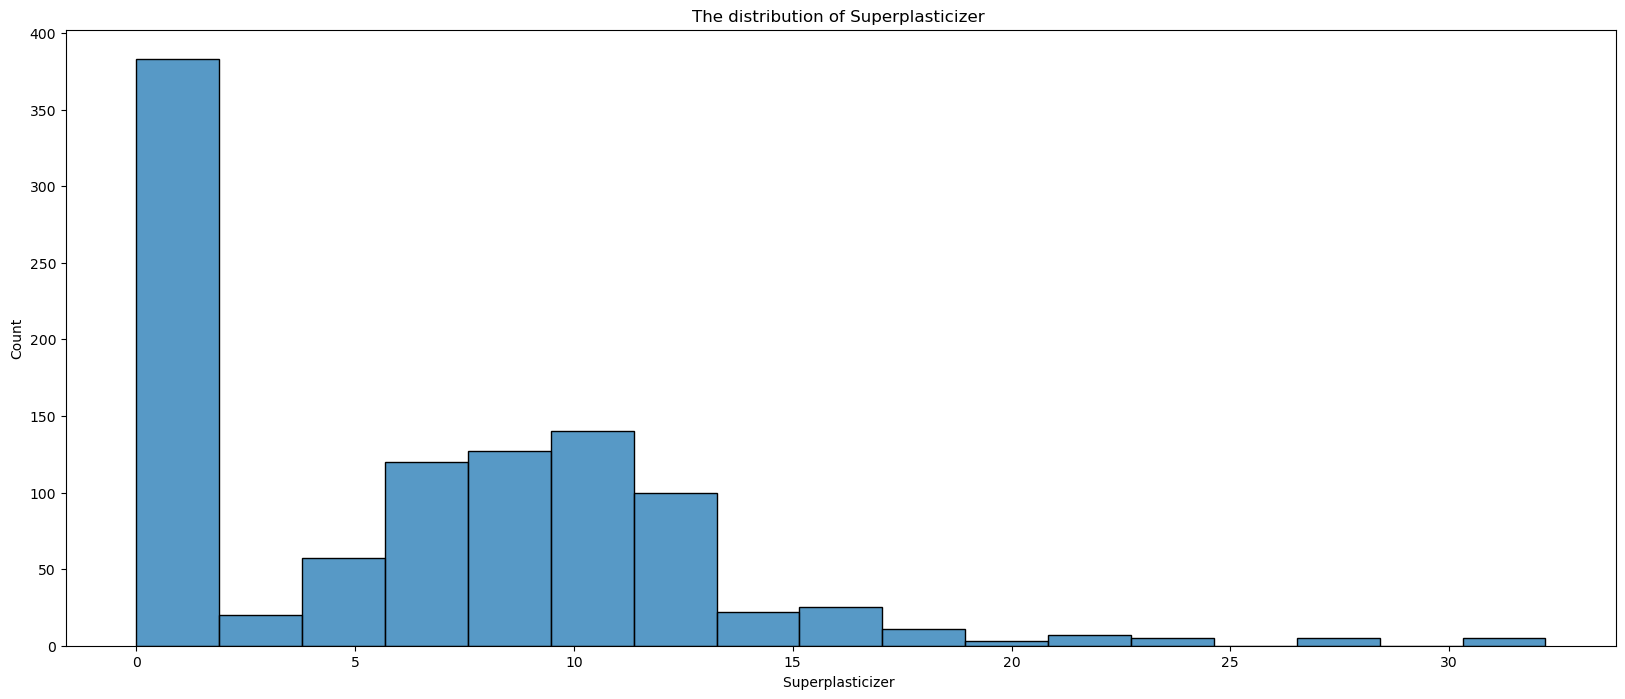

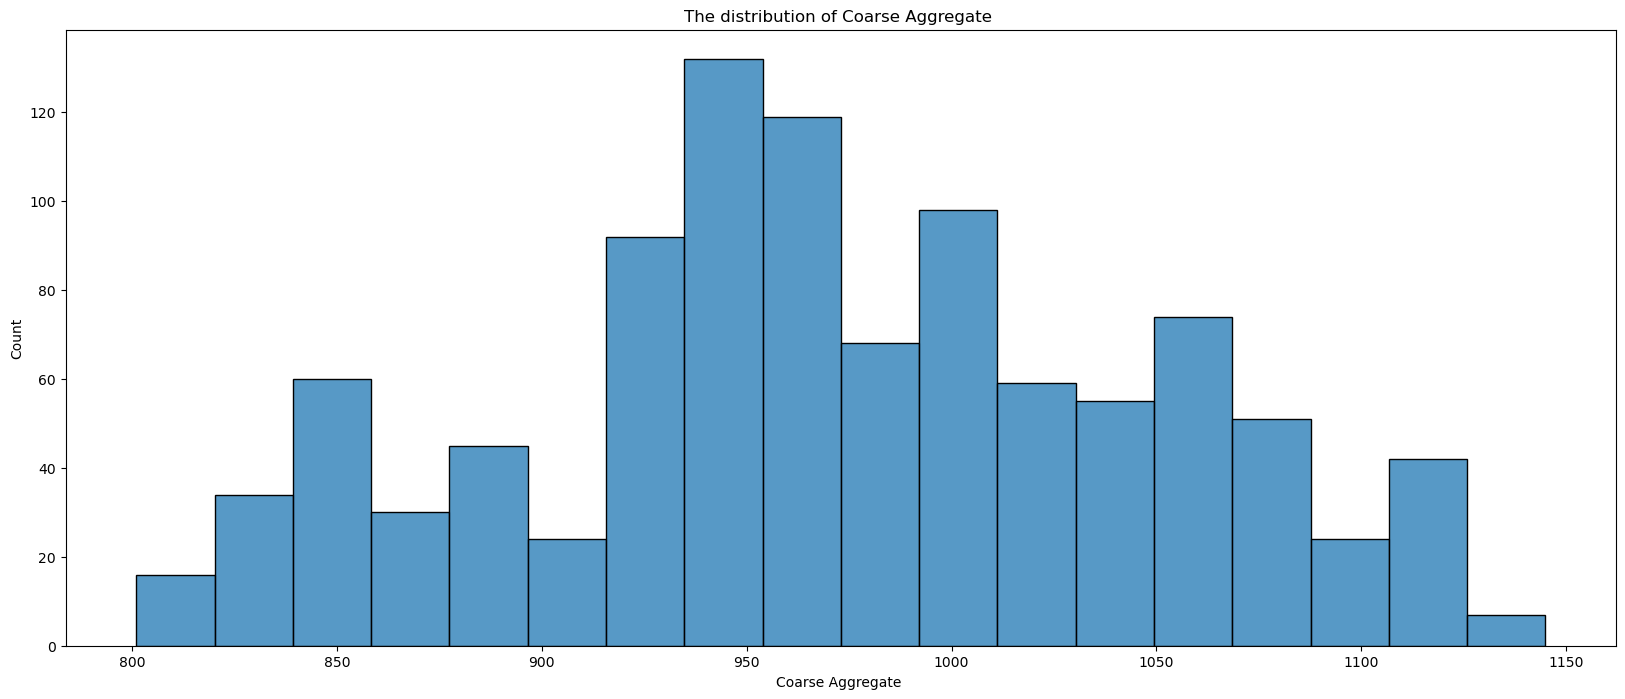

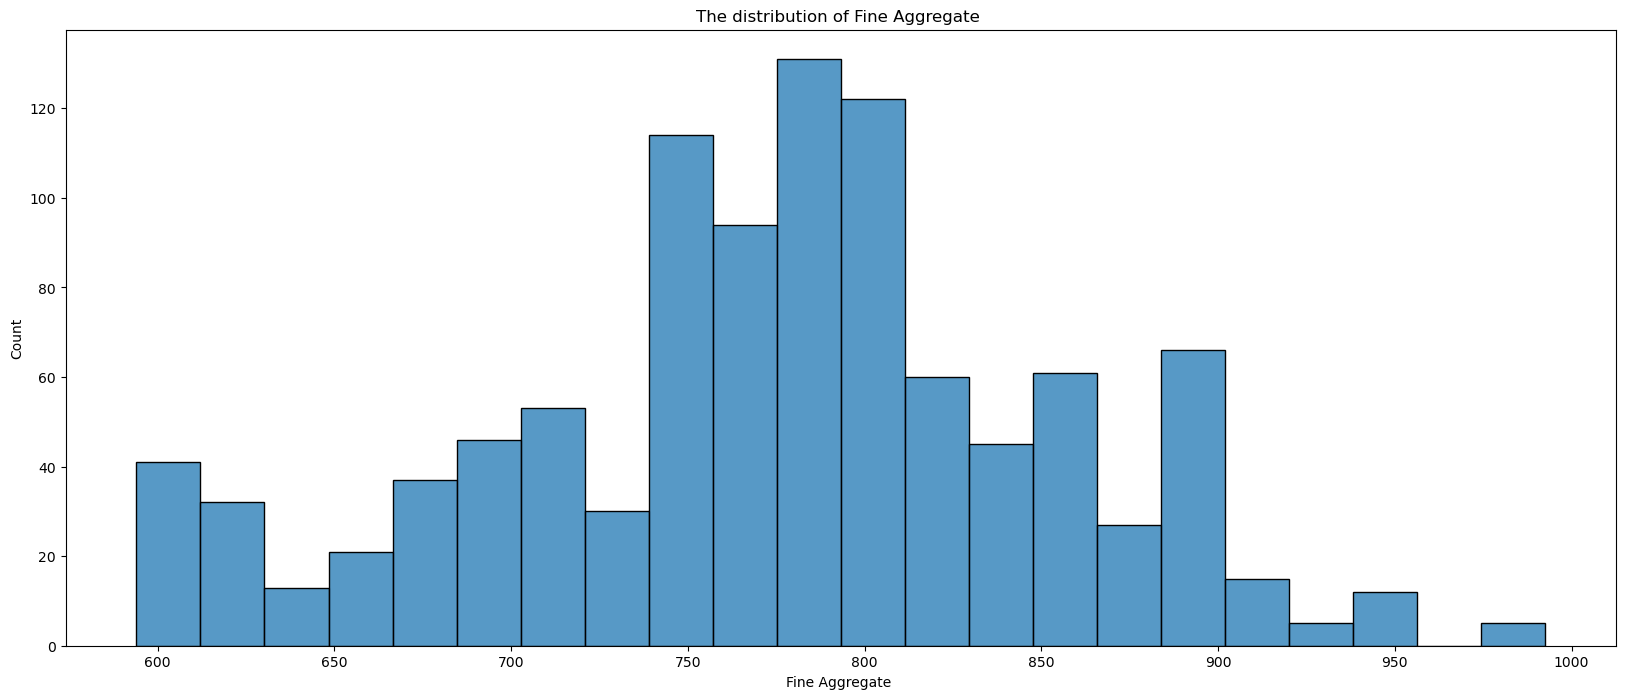

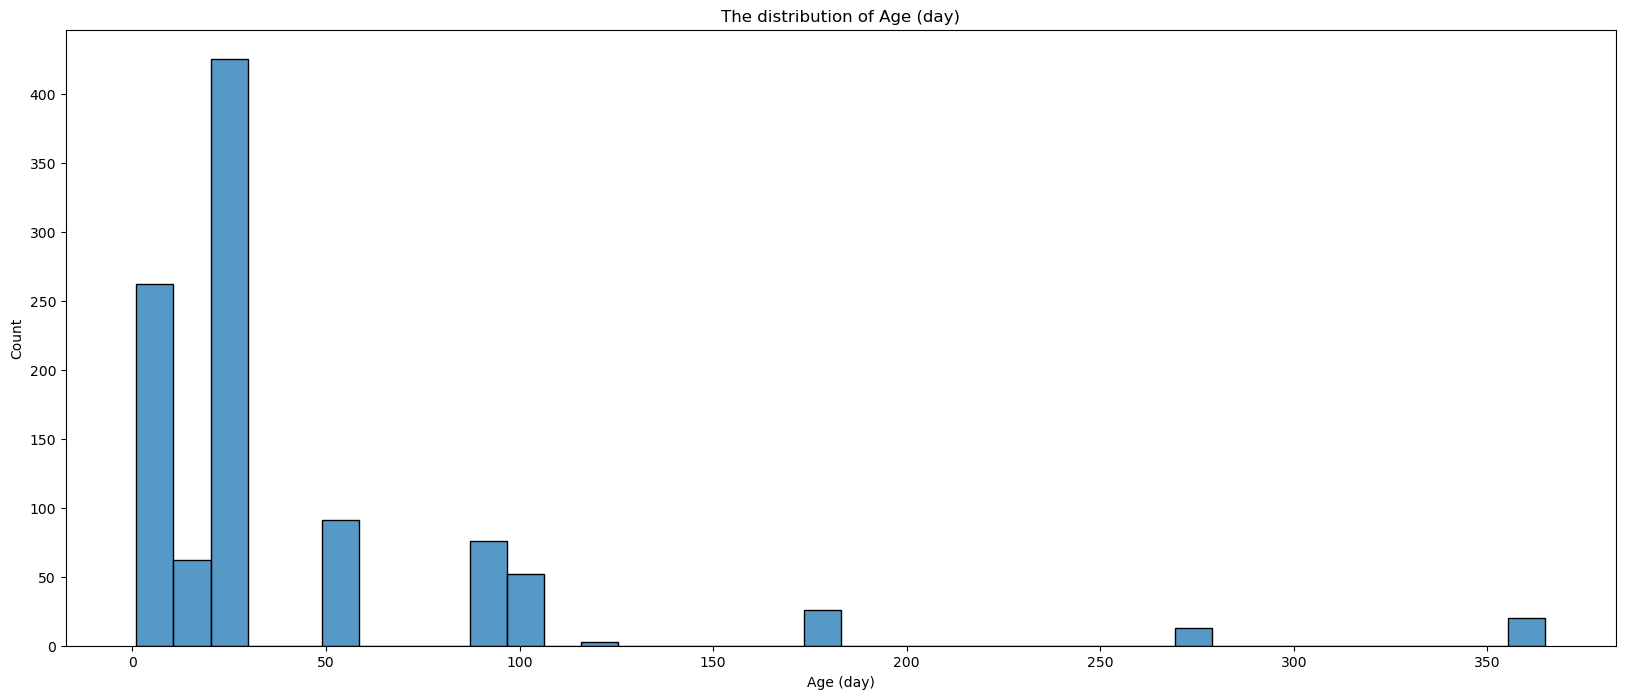

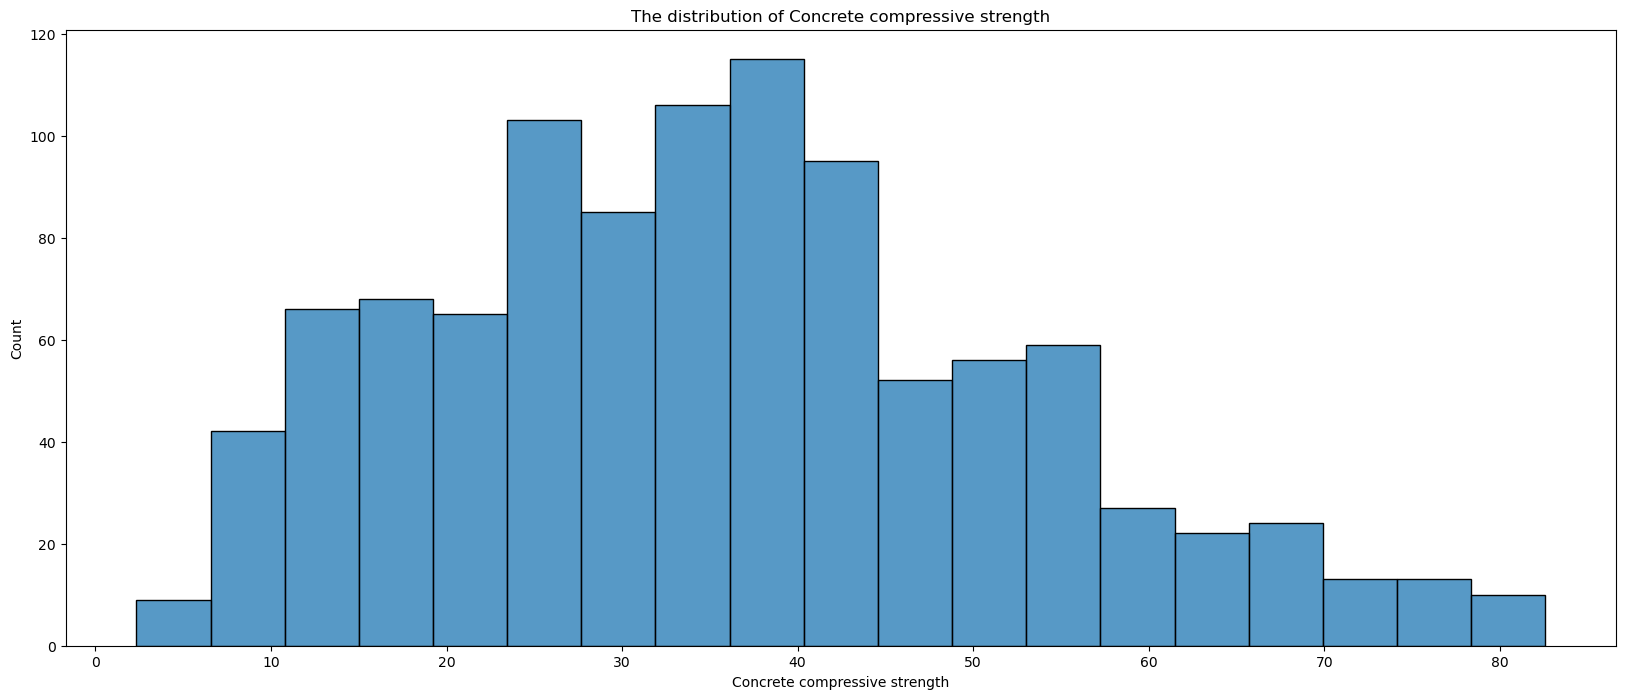

In [10]:
for column in  df.columns[3:][:6]:
    show_histogram(column)

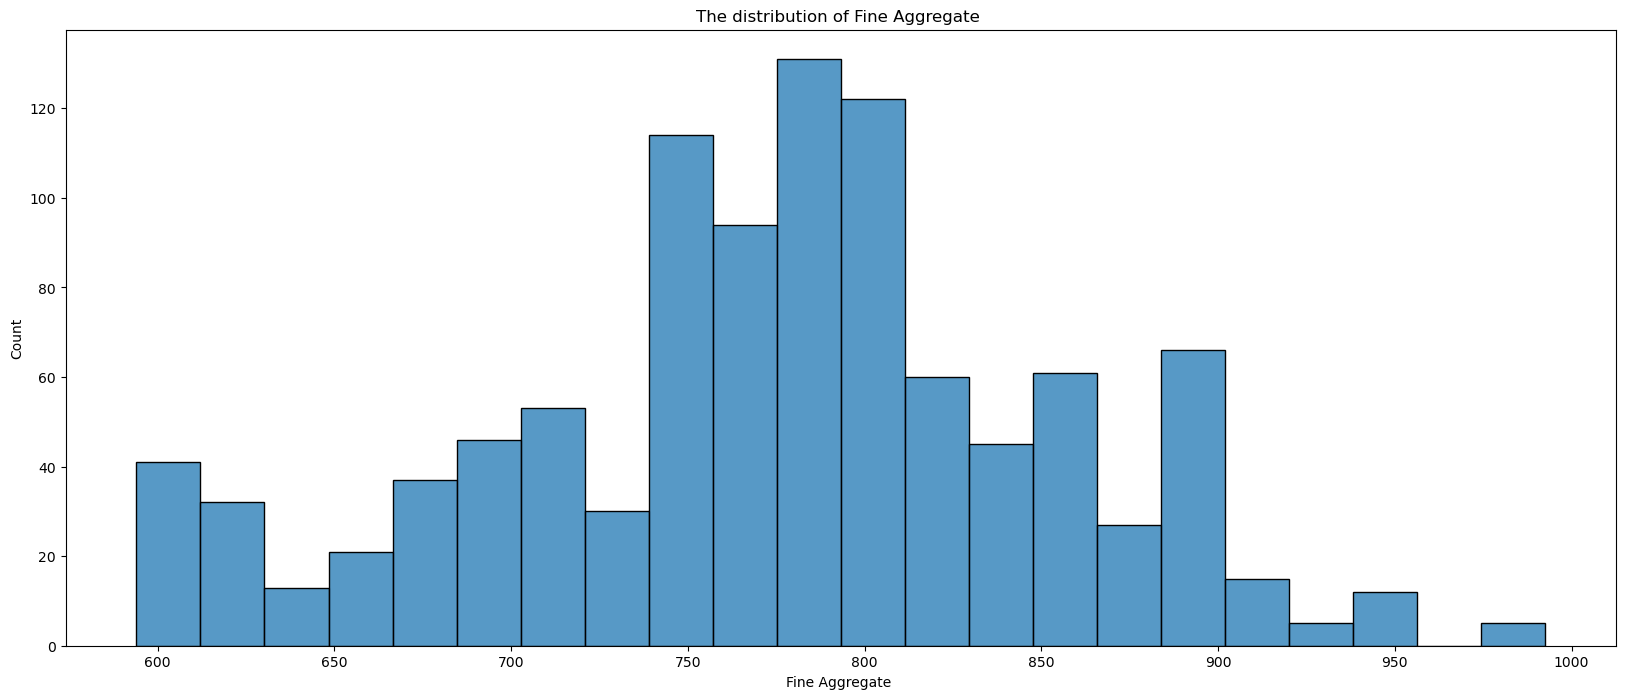

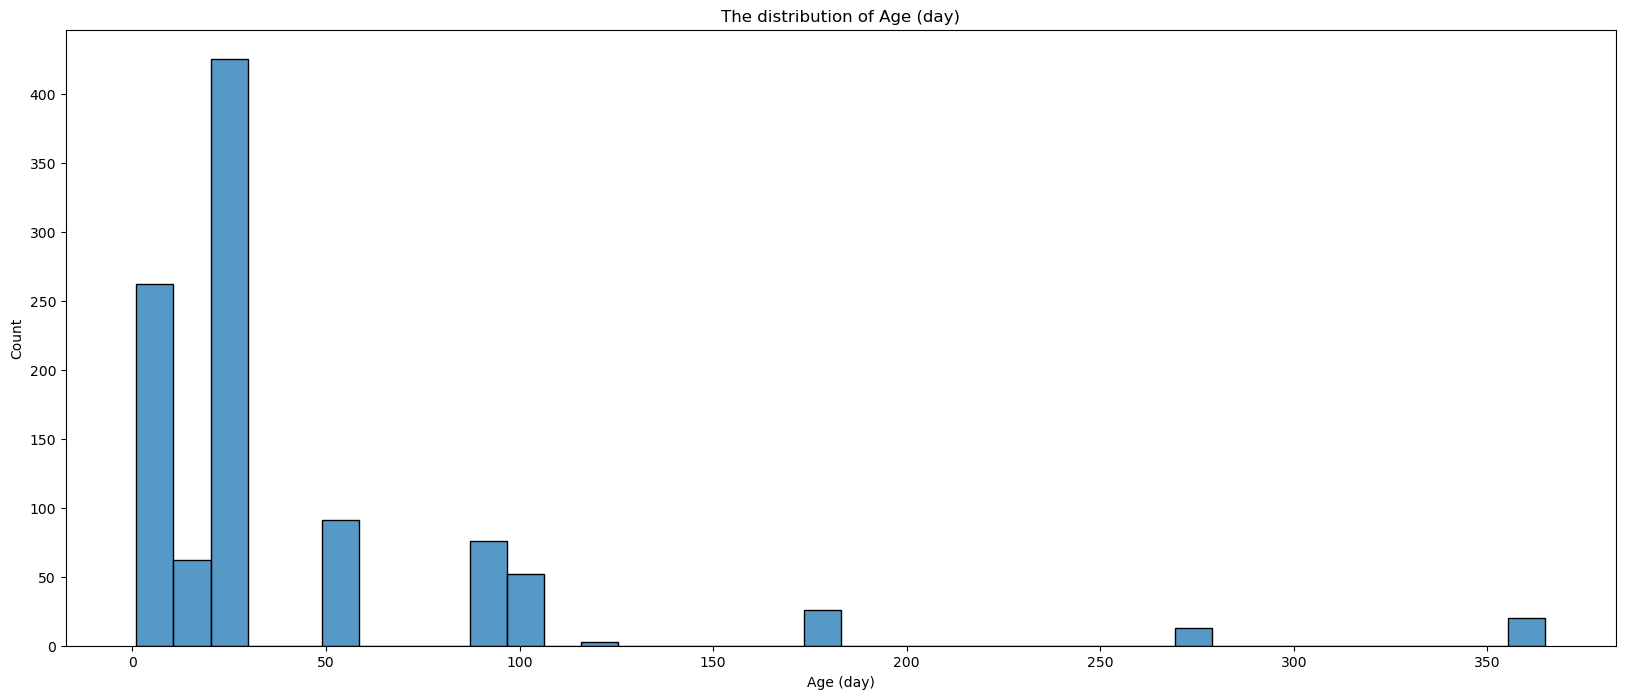

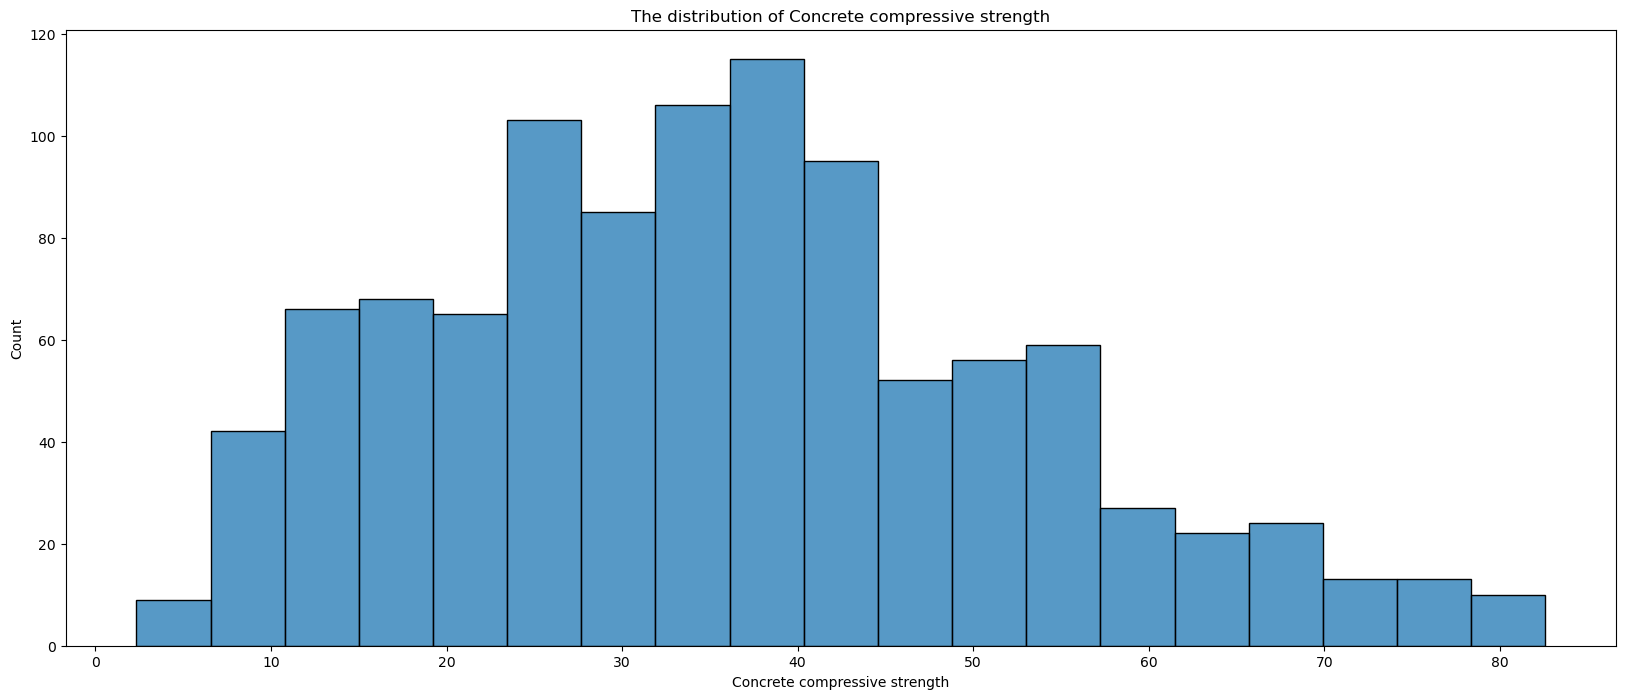

In [11]:
for column in df.columns[6:]:
    show_histogram(column)

In [12]:
# Now that we have mapped the individual distributions of our variables 
# Cement Strength predictions will be highly be due to the joint distribution between some of these variables and cement strenght
# I will investigate the correlations between the variables in our dataframe

correlation = df.corr()

In [13]:
correlation # FlyAsh,Water,Coarse Aggregate,Fine Aggreagate are negatively correlated with the cement strenght,what does it mean?

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
Cement,1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
Blast Furnace Slag,-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
Fly Ash,-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
Water,-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
Superplasticizer,0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
Coarse Aggregate,-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
Fine Aggregate,-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
Age (day),0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
Concrete compressive strength,0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000


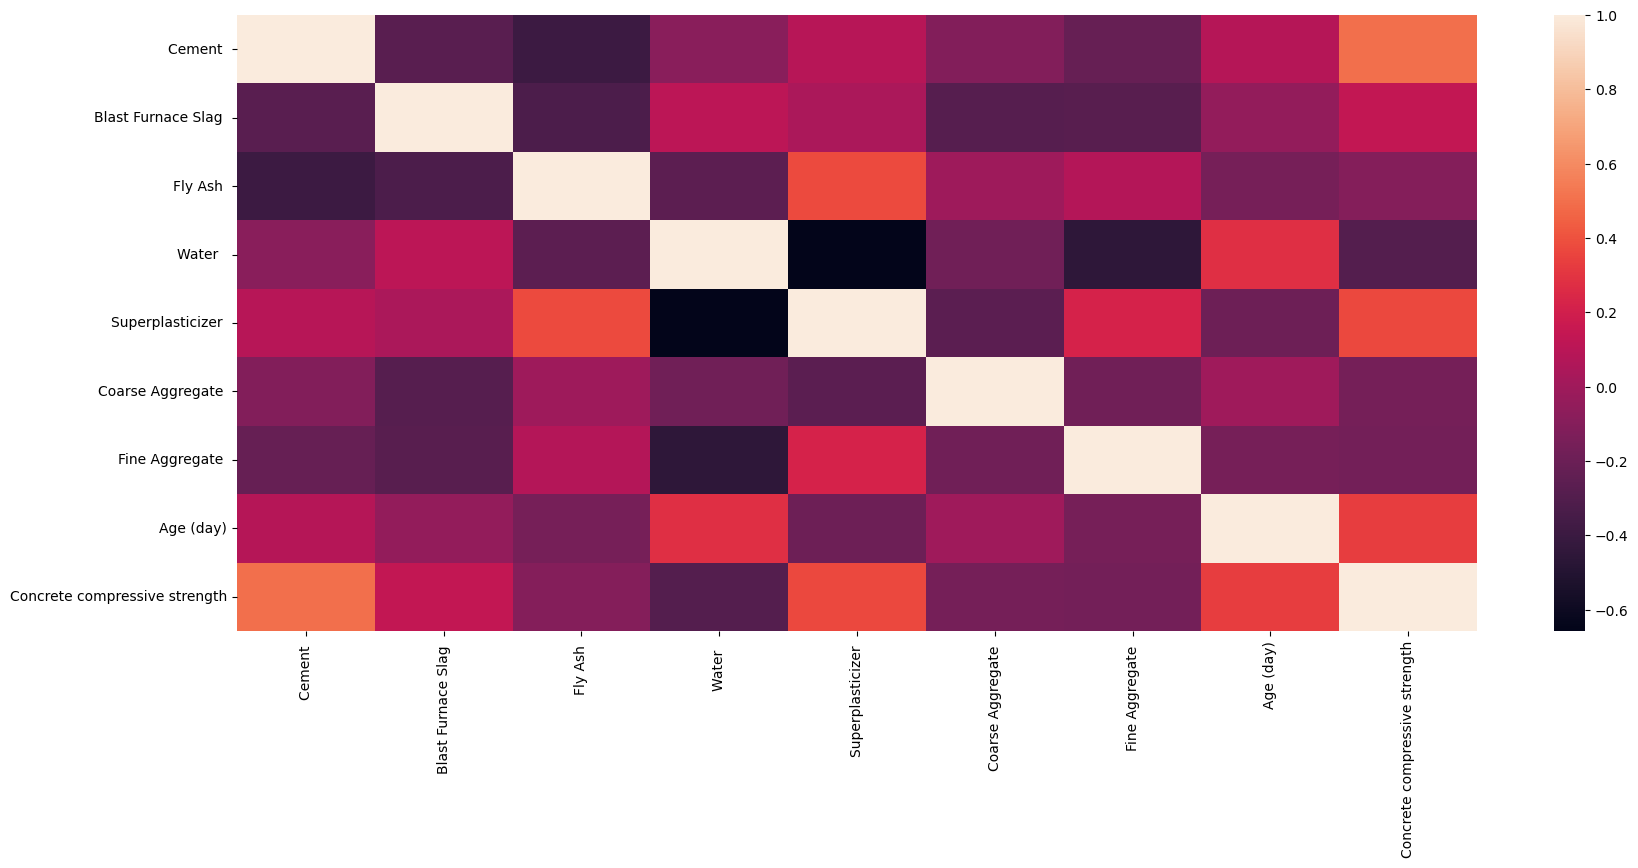

In [14]:
# A heatmap to further elaborate this relationship
fig = plt.figure(figsize=(20,8))
sns.heatmap(correlation)
plt.show()

<Figure size 2000x800 with 0 Axes>

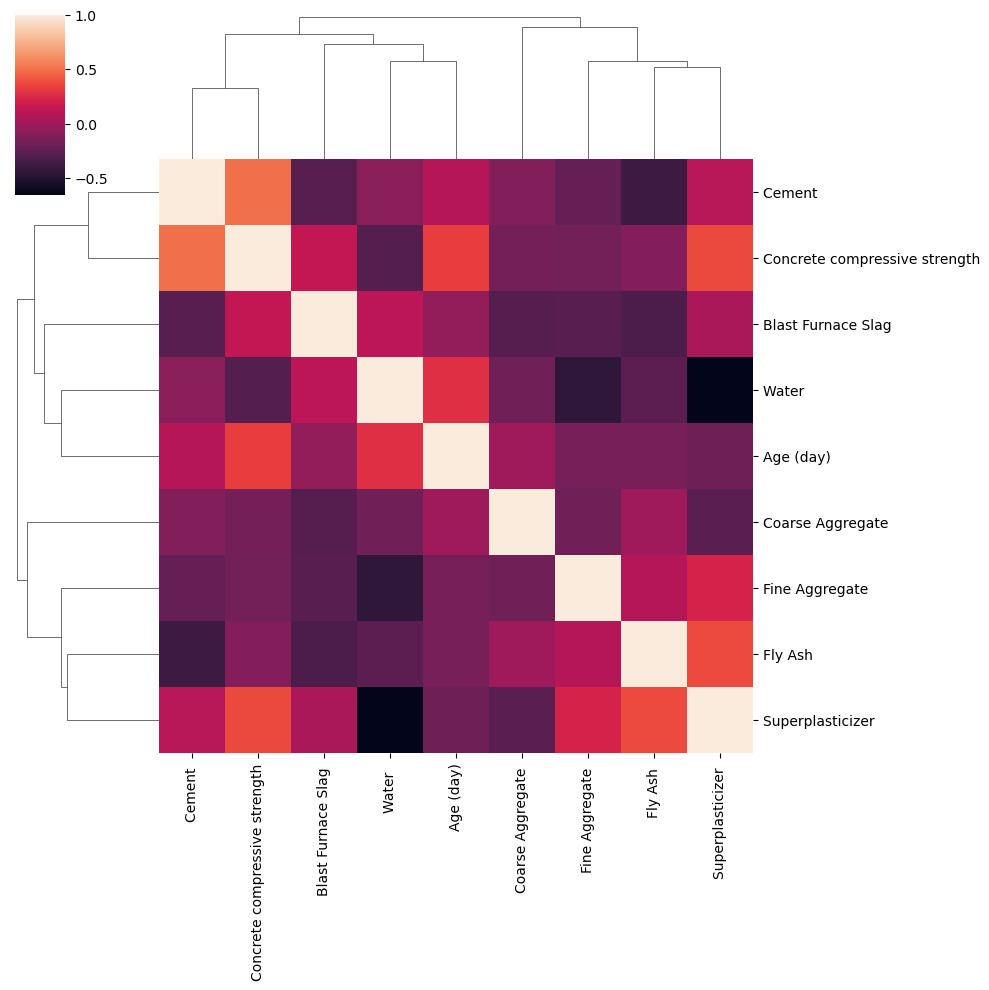

In [15]:
fig=plt.figure(figsize=(20,8))
sns.clustermap(correlation) # Water affects the strenght immensely,maybe because water is used in mixing materials??
plt.show()

In [16]:
# Creating a function that plots a joint plot between WATER concentration and OTHER columns

def joint_plot(other,water=df['Water  '],df=df):
               plt.figure(figsize=(20,8))
               sns.jointplot(x=water,y=other,data=df)
               plt.title(f"The Joint Distribution of water and {other}")
               plt.show()

<Figure size 2000x800 with 0 Axes>

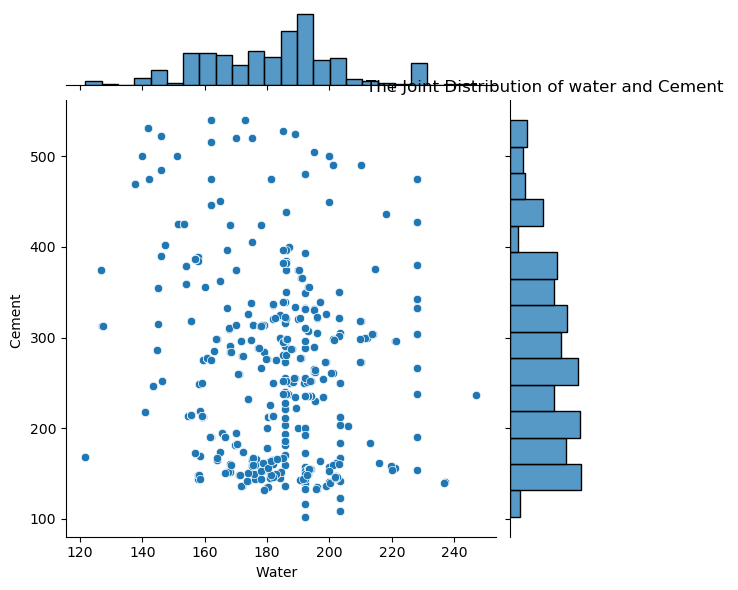

<Figure size 2000x800 with 0 Axes>

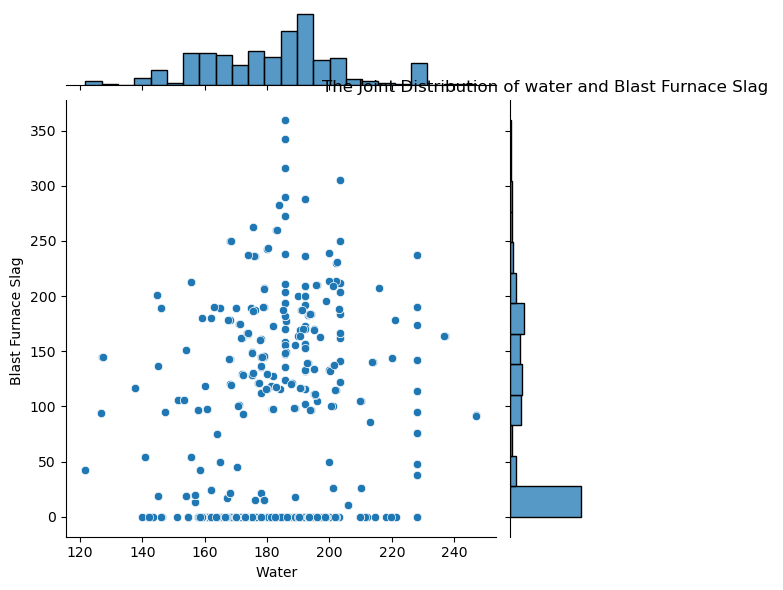

<Figure size 2000x800 with 0 Axes>

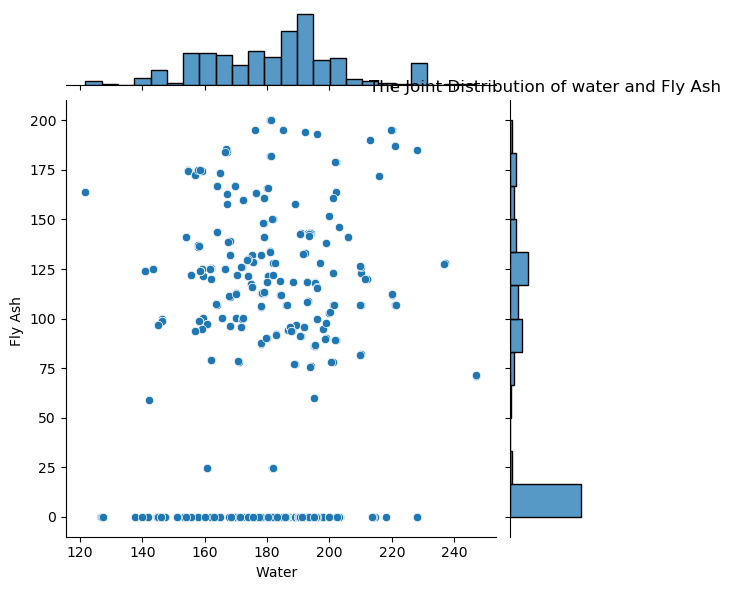

<Figure size 2000x800 with 0 Axes>

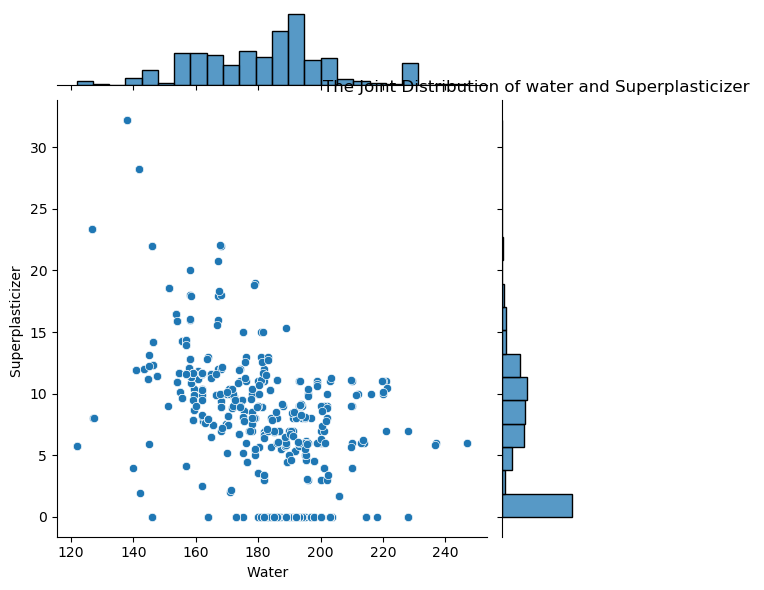

<Figure size 2000x800 with 0 Axes>

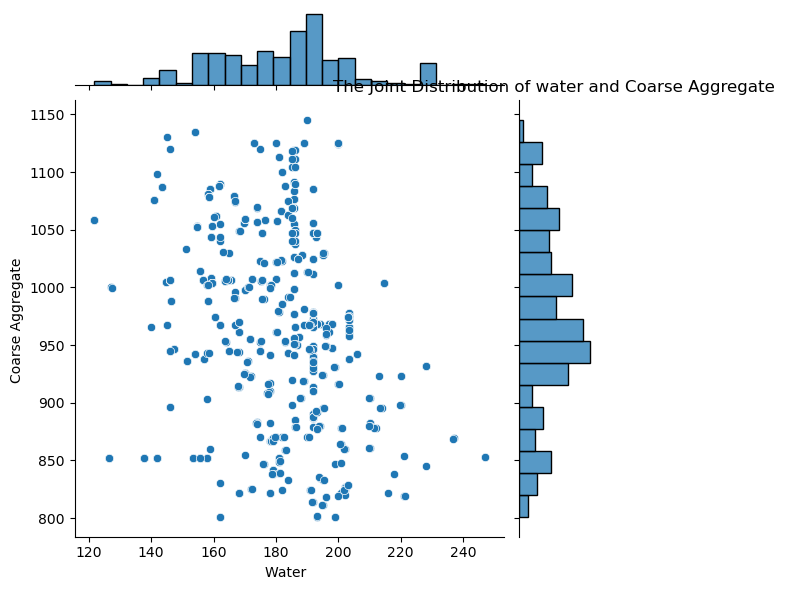

<Figure size 2000x800 with 0 Axes>

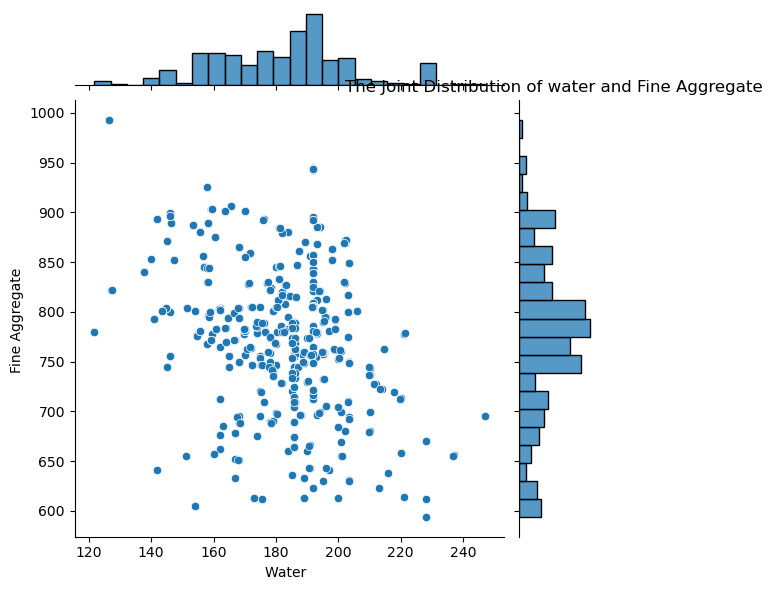

<Figure size 2000x800 with 0 Axes>

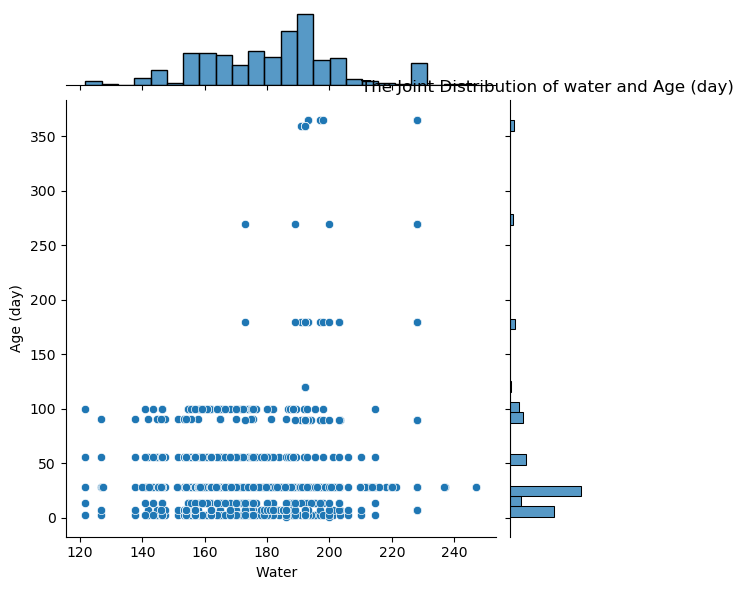

<Figure size 2000x800 with 0 Axes>

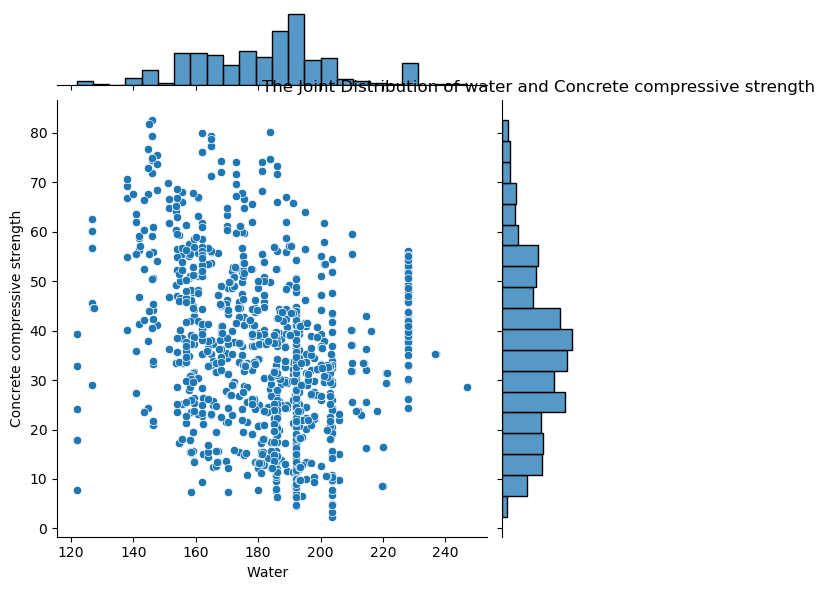

In [17]:
others =df.drop(['Water  '],axis=1)
for other in others:
    joint_plot(other)

<Figure size 2000x800 with 0 Axes>

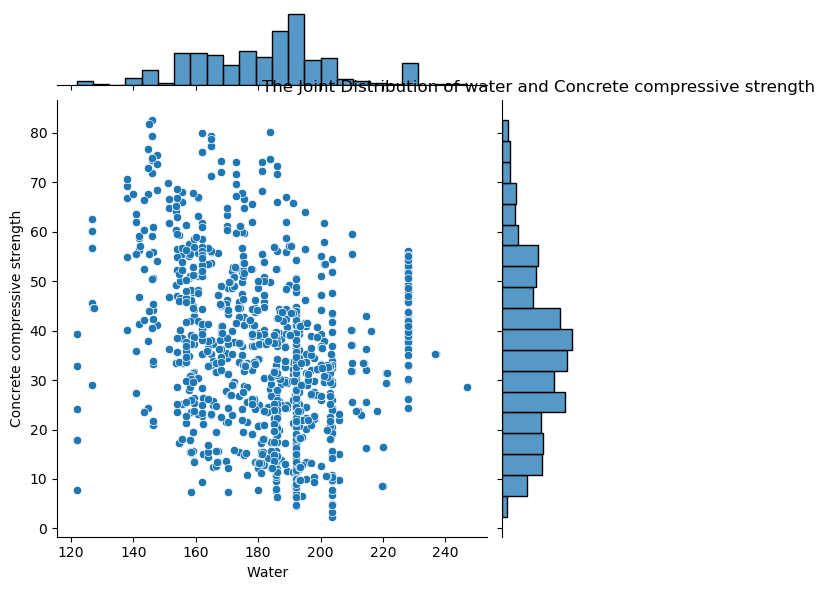

In [18]:
# Cement Strenght is what we are trying to predict and so I will check its joint distribution
# The more the concentration of water ,the less compressive strenght 
joint_plot('Concrete compressive strength')

# DATA PREPROCESSING

In [19]:
df.columns

Index(['Cement ', 'Blast Furnace Slag ', 'Fly Ash ', 'Water  ',
       'Superplasticizer ', 'Coarse Aggregate ', 'Fine Aggregate ',
       'Age (day)', 'Concrete compressive strength'],
      dtype='object')

In [24]:
# I will divide the data into Targets and Labels
X = df.drop(['Concrete compressive strength'],axis=1).values
y  = df['Concrete compressive strength'].values.reshape(-1,1)

In [25]:
# Perfoming a train_test_split
# Here I divide my data into Training Data and Test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
# Scaling my X values so that we avoid overfitting  and so my ML Model learns better
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
y_train = scaler.fit_transform(y_train)
y_test = scaler.fit_transform(y_test)


In [27]:
# Check the shapes of our training data
X_train.shape,y_train.shape

((824, 8), (824, 1))

In [29]:
# Check the samples of our testing data
X_test.shape,y_test.shape

((206, 8), (206, 1))

# MACHINE LEARNING : REGRESSION

In [30]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
# instatiating the model
lr = LinearRegression()
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)
print(f"The mean absolute error for Linear Regression is {mean_absolute_error(y_test,predictions)}")
print(f"The mean squared error for Linear Regression is {mean_squared_error(y_test,predictions)}")

The mean absolute error for Linear Regression is 0.4892873574123276
The mean squared error for Linear Regression is 0.37783700007473786


In [31]:
# XGB regression
xg_regressor = XGBRegressor()
xg_regressor.fit(X_train,y_train)
xg_predictions = xg_regressor.predict(X_test)
print(f"The mean absolute error for Linear Regression is {mean_absolute_error(y_test,xg_predictions)}")
print(f"The mean squared error for Linear Regression is {mean_squared_error(y_test,xg_predictions)}")

The mean absolute error for Linear Regression is 0.31071806991326983
The mean squared error for Linear Regression is 0.17283087975309508


In [32]:
# RandomForestRegressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train,y_train)
rf_predictions = rf_regressor.predict(X_test)
print(f"The mean absolute error for Linear Regression is {mean_absolute_error(y_test,rf_predictions)}")
print(f"The mean squared error for Linear Regression is {mean_squared_error(y_test,rf_predictions)}")

C:\Users\EDGAR MUYALE DAVIES\AppData\Local\Temp\ipykernel_8100\2506818247.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train,y_train)


The mean absolute error for Linear Regression is 0.3233490058719741
The mean squared error for Linear Regression is 0.17658199058139404


Gradient Boosted Regression outperformed Random Forest Regression and Linear Regression.
Overally XGBoost was the Best at : 0.3107 Mean Absolute Error

In [41]:
# Predictions
scaler.inverse_transform(xg_predictions.reshape(1,-1))

array([[50.514835 , 53.383575 , 67.578125 , 53.383575 , 10.717143 ,
        42.473103 , 24.783958 , 53.029495 , 37.535816 , 41.97614  ,
        43.37424  , 18.133299 , 53.75828  , 39.929802 , 26.384962 ,
        26.838516 , 30.772848 , 19.240768 , 35.441414 , 31.66509  ,
        35.656635 , 26.336235 , 48.75845  , 15.25228  , 31.68194  ,
        35.75787  , 10.690505 , 53.433197 , 53.246185 , 22.705793 ,
        57.697517 , 36.006573 , 47.248215 , 49.71126  , 20.13555  ,
        40.899643 , 37.520382 , 41.627796 , 13.293216 , 45.850716 ,
        15.609454 , 11.109975 , 33.152702 , 48.211727 , 15.4239855,
        61.896282 , 56.800323 , 34.888042 , 29.074137 , 12.739644 ,
        53.650684 , 45.712193 , 24.023657 , 17.989315 , 58.243427 ,
        54.388977 , 27.608475 , 14.632741 , 34.114845 , 23.727337 ,
        41.908073 , 16.7751   , 33.75588  , 53.025078 , 28.170916 ,
        13.730752 , 42.388447 , 18.072224 , 28.816568 , 27.251034 ,
        16.73192  , 27.538166 , 13.773738 , 43.3

# END OF THE PROJECT 
